Do your work for this exercise in a jupyter notebook named ```modeling``` within the ```regression-exercises``` repo. Add, commit, and push your work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, TweedieRegressor

from sklearn.feature_selection import RFE

Select a dataset with a continuous target variable.

In [2]:
from pydataset import data

tips = data('tips')
    
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [3]:
#Check for nulls

tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


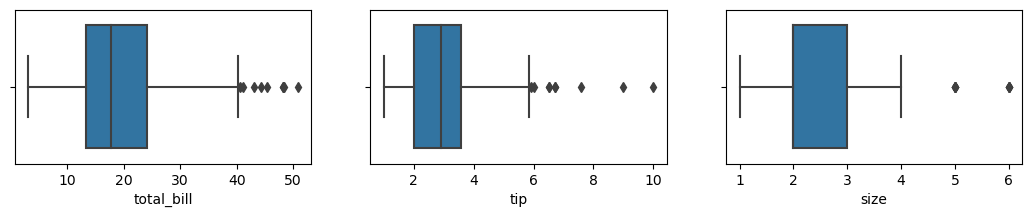

In [4]:
#Check for outliers
plt.figure(figsize=(13,2))

for i, col in enumerate(tips[['total_bill', 'tip', 'size']]):
    plt.subplot(1,3,(i+1))
    sns.boxplot(x=tips[col])

plt.show()

The outliers don't seem that terrible. I'll keep them in.

In [5]:
#Add an additional feature

tips['price_per_person'] = tips.total_bill / tips['size']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [6]:
#Encode string values

dummy_df = pd.get_dummies(tips[['sex', 'smoker', 'day', 'time']], drop_first=True)

dummy_df.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,0,0,1,0,0


In [7]:
tips = pd.concat([tips, dummy_df], axis=1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0,0,0,1,0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1,0,0,1,0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1,0,0,1,0,0
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,1,0,0,1,0,0
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,0,0,0,1,0,0


In [8]:
import wrangle as w

In [9]:
train, validate, test = w.split_data(tips)

cols = ['total_bill', 'size', 'price_per_person']

train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test, cols)

In [10]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
225,13.42,1.58,Male,Yes,Fri,Lunch,2,6.710000,1,1,0,0,0,1
182,23.33,5.65,Male,Yes,Sun,Dinner,2,11.665000,1,1,0,1,0,0
103,44.30,2.50,Female,Yes,Sat,Dinner,3,14.766667,0,1,1,0,0,0
165,17.51,3.00,Female,Yes,Sun,Dinner,2,8.755000,0,1,0,1,0,0
74,25.28,5.00,Female,Yes,Sat,Dinner,2,12.640000,0,1,1,0,0,0


In [11]:
train_scaled.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
225,-0.342967,1.58,Male,Yes,Fri,Lunch,0.0,-0.151417,1,1,0,0,0,1
182,0.611753,5.65,Male,Yes,Sun,Dinner,0.0,1.387602,1,1,0,1,0,0
103,2.631985,2.50,Female,Yes,Sat,Dinner,1.0,2.350977,0,1,1,0,0,0
165,0.051060,3.00,Female,Yes,Sun,Dinner,0.0,0.483758,0,1,0,1,0,0
74,0.799615,5.00,Female,Yes,Sat,Dinner,0.0,1.690436,0,1,1,0,0,0


In [12]:
train_scaled.columns.tolist()

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'size',
 'price_per_person',
 'sex_Male',
 'smoker_Yes',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Lunch']

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [13]:
#Setting the baseline

train_scaled.tip.mean()

2.9810958904109603

In [14]:
#Seeing how it performs with evaluation metric functions I created during evaluate

yhat = np.full(len(train_scaled), train_scaled.tip.mean())

In [15]:
import evaluate as ev

y = train_scaled.tip

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
rmse = mean_squared_error(y, yhat, squared=False)
r2 = r2_score(y, yhat)

rmse, r2

(1.451105446961829, 2.220446049250313e-16)

R^2 will be 0 since it is based off of mean (and ESS value, as seen above, is 0)

In [ ]:
#Run through feature selection to send into model


In [21]:
#Function imported from feature engineering lesson

def rfe(X_train, y_train, n=2):
    '''Takes in a scaled X_train, y_train, and number of features (default=2), and outputs the 
    top number of features in X_train that are most predictive based off of Recursive Feature Elimination modeling.
    '''
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    return X_train.iloc[:, rfe.support_].columns.tolist()

In [78]:
model_cols = ['price_per_person', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']

model_cols = rfe(train_scaled[model_cols], train_scaled.tip, n=4)

In [79]:
model_cols

['price_per_person', 'smoker_Yes', 'day_Sat', 'day_Sun']

In [60]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'baseline',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,baseline,1.451105,2.220446e-16


In [80]:
#Now to go down the list of models. 

#First, OLS

X_train = train_scaled[model_cols]
y_train = train_scaled.tip

X_validate = validate_scaled[model_cols]
y_validate = validate_scaled.tip

X_test = test_scaled[model_cols]
y_test = test_scaled.tip

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.predict(X_train)

array([2.44991715, 3.6963916 , 3.85987822, 3.24141427, 3.52737474,
       3.18747366, 4.00140605, 2.26555734, 3.03987874, 2.66471826,
       3.03464436, 2.43934082, 2.65017736, 3.52516222, 4.11759447,
       3.0649708 , 2.77822858, 3.13728249, 3.51515879, 2.99060589,
       2.34125417, 2.76843016, 3.14658734, 3.27112069, 3.04417835,
       4.57976684, 3.52844851, 3.25467741, 2.53611828, 2.65038621,
       2.61968919, 2.7422909 , 3.36959437, 2.86776388, 2.28809531,
       2.6159893 , 2.60639947, 3.33848375, 3.218717  , 2.55167711,
       2.90695885, 2.94945412, 2.38334071, 3.221844  , 2.67662406,
       3.42812418, 3.62410264, 3.04326388, 3.04975815, 2.6230516 ,
       3.00454463, 2.6540861 , 2.95200821, 3.00608155, 2.62810639,
       2.72451954, 3.32011267, 2.18959506, 2.87396614, 2.34373214,
       3.41665855, 3.01923854, 2.60313975, 2.3514169 , 2.92298469,
       3.45694129, 2.98028386, 3.7178631 , 2.73637849, 2.5753384 ,
       2.95308198, 2.78463801, 2.64991678, 2.80282707, 3.06158

In [81]:
rmse = mean_squared_error(y_train, lr.predict(X_train), squared=False)
r2 = r2_score(y_train, lr.predict(X_train))

rmse, r2

(1.36430751182806, 0.11605224718320306)

In [82]:
rmse = mean_squared_error(y_validate, lr.predict(X_validate), squared=False)
r2 = r2_score(y_validate, lr.predict(X_validate))

In [83]:
rmse, r2

(1.1091399069514467, -0.38596788974128815)

In [84]:
metrics_df.loc[1] = ['ols', rmse, r2]

metrics_df

,model,rmse,r2
0,baseline,1.451105,2.220446e-16
1,ols,1.109140,-3.859679e-01


In [91]:
#That was incredibly bad. Let's try LASSO

lass = LassoLars(alpha=10)
lass.fit(X_train, y_train)

lass.predict(X_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array([2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589,
       2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109

In [88]:
X_train

,price_per_person,smoker_Yes,day_Sat,day_Sun
225,-0.151417,1,0,0
182,1.387602,1,0,1
103,2.350977,1,1,0
165,0.483758,1,0,1
74,1.690436,1,1,0
175,0.376602,1,0,1
4,1.441957,0,0,1
150,-1.069238,0,0,0
86,0.469005,0,0,0
41,-0.574867,0,1,0


In [89]:
lass.coef_

array([0., 0., 0., 0.])

In [71]:
y_train

225    1.58
182    5.65
103    2.50
165    3.00
74     5.00
175    4.00
4      3.31
150    2.00
86     5.17
41     2.24
19     3.50
173    5.15
119    1.80
29     4.30
238    1.17
208    3.00
184    6.50
61     3.21
42     2.54
161    3.50
98     1.50
71     1.97
244    3.00
177    2.00
141    3.50
180    3.55
12     5.00
109    3.76
237    1.00
76     1.25
120    2.92
223    1.92
24     7.58
130    2.18
101    2.50
236    1.25
148    1.63
45     5.60
35     3.27
133    1.50
44     1.32
192    4.19
144    5.00
243    1.75
94     4.30
166    3.48
193    2.56
99     3.00
153    2.74
179    4.00
178    2.00
125    2.52
77     3.08
33     3.00
228    3.00
70     2.09
117    5.07
227    2.00
27     2.00
136    1.25
48     6.00
215    6.50
102    3.00
221    2.20
155    2.00
95     3.25
75     2.20
213    9.00
233    3.39
31     1.45
11     1.71
138    2.00
147    1.36
39     2.31
23     2.23
219    1.44
85     2.03
57     3.00
185    3.00
64     3.76
191    1.50
202    2.01
55     4.34
79  

In [90]:
rmse = mean_squared_error(y_validate, lass.predict(X_validate), squared=False)
r2 = r2_score(y_validate, lass.predict(X_validate))

rmse, r2

(0.9451711945745658, -0.006471450899425912)

In [95]:
#GLM

glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train)

# predict train
glm.predict(X_train)

# evaluate: rmse
rmse = mean_squared_error(y_train, glm.predict(X_train), squared=False)

# predict validate
glm.predict(X_validate)

# evaluate: rmse
rmse = mean_squared_error(y_validate, glm.predict(X_validate), squared=False)
r2 = r2_score(y_validate, glm.predict(X_validate))

rmse, r2

(1.1141715822283171, -0.39857145526682336)

<AxesSubplot:xlabel='tip', ylabel='Count'>

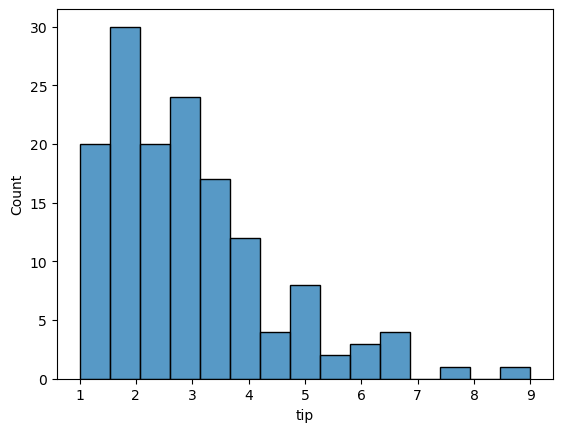

In [93]:
sns.histplot(y_train)

In [96]:
metrics_df.loc[2] = ['glm', rmse, r2]

metrics_df

,model,rmse,r2
0,baseline,1.451105,2.220446e-16
1,ols,1.109140,-3.859679e-01
2,glm,1.114172,-3.985715e-01


In [97]:
#Polynomial

# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [100]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train)

# predict train
lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, lm2.predict(X_train_degree2), squared=False)

# predict validate
lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse = mean_squared_error(y_validate, lm2.predict(X_validate_degree2), squared=False)

r2 = r2_score(y_validate, lm2.predict(X_validate_degree2))

rmse, r2

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(1.4528156210642347, -1.3779433669669818)